Introduction to Regression with Neural Networks in Tensorflow

In [ ]:
# import TensorFlow 
import tensorflow as tf 
print(tf.__version__)

2.9.2


Creating data to view and fit 

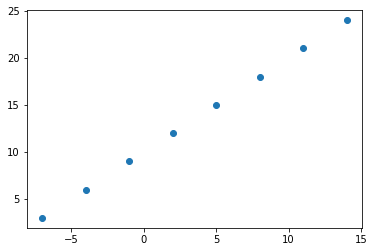

In [ ]:
import numpy as np 
import matplotlib.pyplot as plt 

# create features 
X = np.array([-7.0, -4.0, -1.0, 2.0, 5.0, 8.0, 11.0, 14.0])

# create labels 
y = np.array([3.0, 6.0, 9.0, 12.0, 15.0, 18.0, 21.0, 24.0]) 

# visualize it 
plt.scatter(X, y)

In [ ]:
y == X + 10

array([ True,  True,  True,  True,  True,  True,  True,  True])

Input and Output shapes

In [ ]:
# create a demo tensor for out housing prdiction problems 
house_info = tf.constant(['bedroom', 'bathroom', 'garage'])
house_price = tf.constant([939700])
house_info, house_price

(<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'bedroom', b'bathroom', b'garage'], dtype=object)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([939700], dtype=int32)>)

In [ ]:
X[0], y[0]

(-7.0, 3.0)

In [ ]:
X[1], y[1]

(-4.0, 6.0)

In [ ]:
X[0].shape, y[0].shape

((), ())

In [ ]:
X[0].ndim

0

In [ ]:
# turn our numpy array into tensor 
X = tf.cast(tf.constant(X), dtype = tf.float32) 
y = tf.cast(tf.constant(y), dtype = tf.float32)
X, y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

## Steps in Modelling in TensorFlow 

1. **Creating a model** - define the input and output layers, as well as the hidden layers of a deep learning model_variables 
2. **Compiling a model** - define the loss function(in other words, the function which tells our model how to improve the patterns it is learning) and evaluation metrics (what we can use to interpret the performance of our model). 
3. **Fitting a model** - letting the model try to find patterns between X and y (Features and labels)

In [ ]:
# set random seed 
tf.random.set_seed(42)

# 1. Create a model using Sequential API 
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
]) 

# 2. Compile the model 
model.compile(loss = tf.keras.losses.mae, 
              optimizer = tf.keras.optimizers.SGD(), 
              metrics = ['mae']) 
# 3. Fit the model 
model.fit(tf.expand_dims(X, axis = -1), y, epochs = 5)

Epoch 1/5
1/1 [==============================] - 0s 289ms/step - loss: 11.5048 - mae: 11.5048
Epoch 2/5
1/1 [==============================] - 0s 9ms/step - loss: 11.3723 - mae: 11.3723
Epoch 3/5
1/1 [==============================] - 0s 7ms/step - loss: 11.2398 - mae: 11.2398
Epoch 4/5
1/1 [==============================] - 0s 7ms/step - loss: 11.1073 - mae: 11.1073
Epoch 5/5
1/1 [==============================] - 0s 6ms/step - loss: 10.9748 - mae: 10.9748


In [ ]:
# check out X and y 
X, y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [ ]:
# try and make a prediction 
model.predict([17.0])

1/1 [==============================] - 0s 145ms/step


array([[12.716021]], dtype=float32)

## Improve the model 

We can improve the model, by altering the steps we too to create a model. 

1. **Creating a model** - here we might add more layers, increase the number of hidden units(all called neurons) within each of the hidden layers, change the activation function of each layer 

2. **Compiling a model** - here we might change the optimization function or perhaps the **learning rate** of the optimization dunction  

3. **Fitting a model** - here we migh fit a model for more **epochs** (leave it training for longer) or more data (give the model more examples to learn from)

In [ ]:
# Let's rebuild our model
# set random seed 
tf.random.set_seed(42)

# 1. Create a model using Sequential API 
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
]) 

# 2. Compile the model 
model.compile(loss = tf.keras.losses.mae, 
              optimizer = tf.keras.optimizers.SGD(), 
              metrics = ['mae']) 
# 3. Fit the model : we will train for longer
model.fit(tf.expand_dims(X, axis = -1), y, epochs = 100)

Epoch 1/100
1/1 [==============================] - 0s 304ms/step - loss: 11.5048 - mae: 11.5048
Epoch 2/100
1/1 [==============================] - 0s 8ms/step - loss: 11.3723 - mae: 11.3723
Epoch 3/100
1/1 [==============================] - 0s 11ms/step - loss: 11.2398 - mae: 11.2398
Epoch 4/100
1/1 [==============================] - 0s 8ms/step - loss: 11.1073 - mae: 11.1073
Epoch 5/100
1/1 [==============================] - 0s 8ms/step - loss: 10.9748 - mae: 10.9748
Epoch 6/100
1/1 [==============================] - 0s 7ms/step - loss: 10.8423 - mae: 10.8423
Epoch 7/100
1/1 [==============================] - 0s 7ms/step - loss: 10.7098 - mae: 10.7098
Epoch 8/100
1/1 [==============================] - 0s 6ms/step - loss: 10.5773 - mae: 10.5773
Epoch 9/100
1/1 [==============================] - 0s 8ms/step - loss: 10.4448 - mae: 10.4448
Epoch 10/100
1/1 [==============================] - 0s 6ms/step - loss: 10.3123 - mae: 10.3123
Epoch 11/100
1/1 [==============================] - 0s 6

In [ ]:
model.predict([17.0])

1/1 [==============================] - 0s 46ms/step


array([[30.158512]], dtype=float32)

In [ ]:
# Let's see if we can make another change to imporve our model 
# create another model (this time with an extra hidden layers and 100 hidden units 
# set random seed 
tf.random.set_seed(42)

# 1. Create a model using Sequential API 
model = tf.keras.Sequential([
    tf.keras.layers.Dense(100, activation = 'relu'), 
    tf.keras.layers.Dense(1)
]) 

# 2. Compile the model 
model.compile(loss = tf.keras.losses.mae, 
              optimizer = tf.keras.optimizers.SGD(), 
              metrics = ['mae']) 
# 3. Fit the model 
model.fit(tf.expand_dims(X, axis = -1), y, epochs = 100)

Epoch 1/100
1/1 [==============================] - 0s 306ms/step - loss: 12.3185 - mae: 12.3185
Epoch 2/100
1/1 [==============================] - 0s 11ms/step - loss: 11.7696 - mae: 11.7696
Epoch 3/100
1/1 [==============================] - 0s 9ms/step - loss: 11.2132 - mae: 11.2132
Epoch 4/100
1/1 [==============================] - 0s 9ms/step - loss: 10.6444 - mae: 10.6444
Epoch 5/100
1/1 [==============================] - 0s 7ms/step - loss: 10.0534 - mae: 10.0534
Epoch 6/100
1/1 [==============================] - 0s 8ms/step - loss: 9.4344 - mae: 9.4344
Epoch 7/100
1/1 [==============================] - 0s 5ms/step - loss: 8.7821 - mae: 8.7821
Epoch 8/100
1/1 [==============================] - 0s 6ms/step - loss: 8.0881 - mae: 8.0881
Epoch 9/100
1/1 [==============================] - 0s 6ms/step - loss: 7.3552 - mae: 7.3552
Epoch 10/100
1/1 [==============================] - 0s 7ms/step - loss: 6.5787 - mae: 6.5787
Epoch 11/100
1/1 [==============================] - 0s 6ms/step - 

In [ ]:
model.predict([17.0])

1/1 [==============================] - 0s 56ms/step


array([[31.382648]], dtype=float32)

- Our model is overfitting

In [ ]:
# Let's see if we can make another change to imporve our model 
# change the optimizer and learning rate  
# set random seed 
tf.random.set_seed(42)

# 1. Create a model using Sequential API 
model = tf.keras.Sequential([
    tf.keras.layers.Dense(100, activation = 'relu'), 
    tf.keras.layers.Dense(1)
]) 

# 2. Compile the model 
model.compile(loss = tf.keras.losses.mae, 
              optimizer = tf.keras.optimizers.Adam(lr=0.01), 
              metrics = ['mae']) 
# 3. Fit the model 
model.fit(tf.expand_dims(X, axis = -1), y, epochs = 100)

Epoch 1/100


/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


1/1 [==============================] - 1s 501ms/step - loss: 12.3185 - mae: 12.3185
Epoch 2/100
1/1 [==============================] - 0s 18ms/step - loss: 11.4382 - mae: 11.4382
Epoch 3/100
1/1 [==============================] - 0s 17ms/step - loss: 10.5494 - mae: 10.5494
Epoch 4/100
1/1 [==============================] - 0s 18ms/step - loss: 9.7152 - mae: 9.7152
Epoch 5/100
1/1 [==============================] - 0s 18ms/step - loss: 9.0090 - mae: 9.0090
Epoch 6/100
1/1 [==============================] - 0s 14ms/step - loss: 8.2746 - mae: 8.2746
Epoch 7/100
1/1 [==============================] - 0s 13ms/step - loss: 7.5151 - mae: 7.5151
Epoch 8/100
1/1 [==============================] - 0s 9ms/step - loss: 6.7230 - mae: 6.7230
Epoch 9/100
1/1 [==============================] - 0s 9ms/step - loss: 5.8980 - mae: 5.8980
Epoch 10/100
1/1 [==============================] - 0s 8ms/step - loss: 5.0336 - mae: 5.0336
Epoch 11/100
1/1 [==============================] - 0s 9ms/step - loss: 4.124

In [ ]:
model.predict([17.0])

1/1 [==============================] - 0s 84ms/step


array([[26.206875]], dtype=float32)

- This model works fine

## Evaluating a model 

In practice, a typical workflow you'll go through when building a model 

''' 

Build a model, fit it, evaluate it, tweat it, evaluate it, tweak it, evaluate it 

'''

When it comes to evaluation
> "Visualize, visualize, visualize" 

It's a good idea to visualize: 
* The data - what data are we working with 
* The model itself - what does our model look like?
* The training of a model - how does a model perform while it learns? 
* The predictions of the model - how do the predictions of a model line up against the ground truth(the original lables)

In [ ]:
 # Make a bigger dataset 
X = tf.range(-100, 100, 4)
y = X + 10
X, y

(<tf.Tensor: shape=(50,), dtype=int32, numpy=
 array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
         -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
         -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
          32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
          76,   80,   84,   88,   92,   96], dtype=int32)>,
 <tf.Tensor: shape=(50,), dtype=int32, numpy=
 array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
        -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
         14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
         66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>)

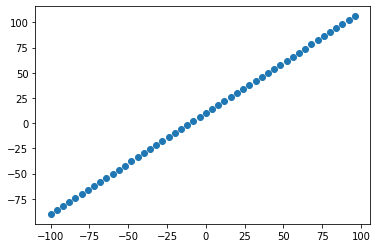

In [ ]:
# visualize the data 
plt.scatter(X, y)

### The 3 sets 

- **Training set** - the model learns from this data, which is typically 70-80% of the total data available (like the course materials you study during the semester).
- **Validation set** - the model gets tuned on this data, which is typically 10-15% of the total data available (like the practice exam you take before the final exam).
- **Test set** - the model gets evaluated on this data to test what it has learned, it's typically 10-15% of the total data available (like the final exam you take at the end of the semester).

- **Training set** - Course materials 
- **Validation set** - Practice exam 
- **Test set** - Final exam 

The idea of the 3 sets is Generalazation. 
> Generaliztion: The ability for a machine learning model to perform well on data it hasn't seen before

In [ ]:
# check length 
len(X)

50

In [ ]:
# split the data into train and test sets 
X_train = X[:40] # first 40 are training samples (80% of the data)
y_train = y[:40]

X_test = X[40:] # last 10 are testing samples (20% of the data)
y_test = y[40:]

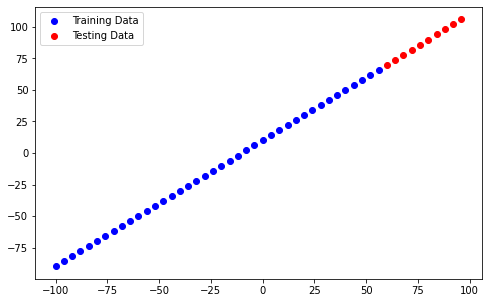

In [ ]:
# visualize the data 
plt.figure(figsize = (8, 5))
plt.scatter(X_train, y_train, c = 'b', label = 'Training Data')
plt.scatter(X_test, y_test, c = 'r', label = 'Testing Data')
plt.legend()
plt.show()

In [ ]:
# 1. Create a model 
model = tf.keras.Sequential([
    tf.keras.layers.Dense(10, input_shape = [1], name = 'input'), 
    tf.keras.layers.Dense(1, name = 'ouput')
], name = 'model_campeone')

# 2. Compile the model 
model.compile(loss = tf.keras.losses.mae, 
              optimizer = tf.keras.optimizers.SGD(), 
              metrics = ['mae'])

In [ ]:
model.summary()

Model: "model_campeone"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input (Dense)               (None, 10)                20        
                                                                 
 ouput (Dense)               (None, 1)                 11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


* Total params - total number of paramaters in the model 
* Trainable Parameters - these are the parameters(patterns) the model can update as it trains 
* Non-trainable params - these parameters arent't updated during training (this is typical when you bring in already learn patterns or parameters from other models during **transfer learning**)

In [ ]:
# Fit the model to the training data 
model.fit(tf.expand_dims(X_train, axis = -1), y_train, epochs = 100, verbose = 0)

In [ ]:
# Get a summary of the model 
model.summary()

Model: "model_campeone"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input (Dense)               (None, 10)                20        
                                                                 
 ouput (Dense)               (None, 1)                 11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


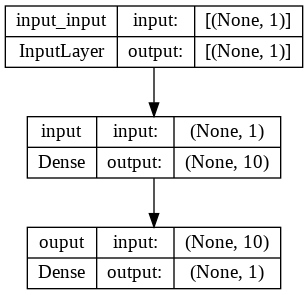

In [ ]:
from tensorflow.keras.utils import plot_model 

plot_model(model = model, show_shapes = True)

### Visualizing our Model's prediction 
To visualize predictions, it's a good idea to plot them against the ground truth values. 

Ofteh you will see this in the form of y_test or y_true versus y_pred (ground truth versus your model prediction)

In [ ]:
# make some predictions 
y_pred = model.predict(X_test)
print(y_pred)

1/1 [==============================] - 0s 17ms/step
[[ 75.90255 ]
 [ 80.84514 ]
 [ 85.787735]
 [ 90.73033 ]
 [ 95.67292 ]
 [100.61552 ]
 [105.55811 ]
 [110.500694]
 [115.44329 ]
 [120.38589 ]]


In [ ]:
y_test

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

In [ ]:
# Let's create a plotting function 
def plot_predictions(train_data = X_train, train_labels = y_train, 
                     test_data = X_test, test_labels = y_test, 
                     predictions = y_pred): 
                     '''Plot training data, test data and compare predictions to ground truth labels.
                     ''' 
                     plt.figure(figsize = (8, 5)) 
                     # plot training data in blue
                     plt.scatter(train_data, train_labels, c = 'b', label = 'Training Data')
                     # plot testing data in green
                     plt.scatter(test_data, test_labels, c = 'g', label = 'Testing Data') 
                     # plot model's prediction in red 
                     plt.scatter(test_data, predictions, c = 'r', label = 'Predictions') 
                     plt.legend()
                     plt.show()

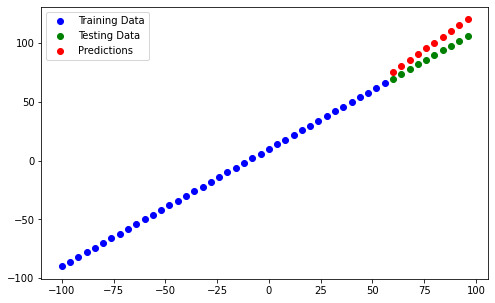

In [ ]:
plot_predictions()

### Evaluating our model's prediction with regression evaluation metrics 

Two of the main metrics are: 
* MAE - mean absolute error - "on average, how wrong is each of my model's predictions" 
* MSE - mean squared error, 'square the average errors'

In [ ]:
 # evaluate the model on the test set 
 model.evaluate(X_test, y_test)

1/1 [==============================] - 0s 251ms/step - loss: 10.1442 - mae: 10.1442


[10.144216537475586, 10.144216537475586]

In [ ]:
y_test

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

In [ ]:
y_pred

array([[ 75.90255 ],
       [ 80.84514 ],
       [ 85.787735],
       [ 90.73033 ],
       [ 95.67292 ],
       [100.61552 ],
       [105.55811 ],
       [110.500694],
       [115.44329 ],
       [120.38589 ]], dtype=float32)

In [ ]:
# calaculate the mean absolute error 
tf.metrics.mean_absolute_error(y_test, y_pred)

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([13.65847 , 11.261945, 10.042453, 10.146067, 11.469168, 13.96931 ,
       17.64649 , 22.500694, 27.443293, 32.385887], dtype=float32)>

In [ ]:
# calaculate the mean absolute error 
tf.metrics.mean_absolute_error(y_test, tf.squeeze(y_pred))

<tf.Tensor: shape=(), dtype=float32, numpy=10.1442175>

In [ ]:
# calaculate the mean squared error 
tf.metrics.mean_squared_error(y_test, y_pred)

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([ 278.3483 ,  183.19205,  136.89412,  139.45471,  190.8737 ,
        291.15128,  440.2873 ,  638.28125,  885.13416, 1180.8456 ],
      dtype=float32)>

In [ ]:
# calaculate the mean squared error 
tf.metrics.mean_squared_error(y_test, tf.squeeze(y_pred))

<tf.Tensor: shape=(), dtype=float32, numpy=110.23513>

In [ ]:
# Make some function to reuse MAE and MSE 
def mae(y_true, y_pred): 
  return tf.metrics.mean_absolute_error(y_true = y_true, 
                                        y_pred = tf.squeeze(y_pred))

def mse(y_true, y_pred): 
  return tf.metrics.mean_squared_error(y_true = y_true, 
                                        y_pred = tf.squeeze(y_pred))

## Running experiments to improve our model 

1. **model_1** - same as original model, 1 layer, trained for 100 epochs.
2. **model_2** - 2 layers, trained for 100 epochs.
3. **model_3** - 2 layers, trained for 500 epochs.

In [ ]:
# set random seed 
tf.random.set_seed(42) 

# 1. Create model 1 
model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(1), 
], name = 'model_1')

# 2. Compile the model 
model_1.compile(loss = tf.keras.losses.mae, 
              optimizer = tf.keras.optimizers.SGD(), 
              metrics = ['mae']) 

# 3. Fit the model 
model_1.fit(tf.expand_dims(X_train, axis = -1), y_train, epochs = 100)

Epoch 1/100
2/2 [==============================] - 1s 5ms/step - loss: 15.9024 - mae: 15.9024
Epoch 2/100
2/2 [==============================] - 0s 9ms/step - loss: 11.2837 - mae: 11.2837
Epoch 3/100
2/2 [==============================] - 0s 5ms/step - loss: 11.1075 - mae: 11.1075
Epoch 4/100
2/2 [==============================] - 0s 5ms/step - loss: 9.2990 - mae: 9.2990
Epoch 5/100
2/2 [==============================] - 0s 5ms/step - loss: 10.1677 - mae: 10.1677
Epoch 6/100
2/2 [==============================] - 0s 9ms/step - loss: 9.4303 - mae: 9.4303
Epoch 7/100
2/2 [==============================] - 0s 7ms/step - loss: 8.5704 - mae: 8.5704
Epoch 8/100
2/2 [==============================] - 0s 5ms/step - loss: 9.0442 - mae: 9.0442
Epoch 9/100
2/2 [==============================] - 0s 4ms/step - loss: 18.7517 - mae: 18.7517
Epoch 10/100
2/2 [==============================] - 0s 5ms/step - loss: 10.1142 - mae: 10.1142
Epoch 11/100
2/2 [==============================] - 0s 5ms/step - l

1/1 [==============================] - 0s 17ms/step


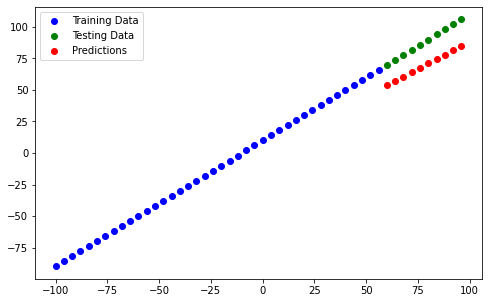

In [ ]:
# make and plot predictions
y_pred_1 = model_1.predict(X_test)
plot_predictions(predictions = y_pred_1)

In [ ]:
# create model evelaution metrics 
mae_1 = mae(y_test, y_pred_1) 
mse_1 = mse(y_test, y_pred_1)
mae_1, mse_1

(<tf.Tensor: shape=(), dtype=float32, numpy=18.745327>,
 <tf.Tensor: shape=(), dtype=float32, numpy=353.57336>)

## Build Model_2 

* 2 dense layers, trained for 100 epochs

In [ ]:
# set random seed 
tf.random.set_seed(42)

# 1. Create model 1 
model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(10), 
    tf.keras.layers.Dense(1)
], name = 'model_2')

# 2. Compile the model 
model_2.compile(loss = tf.keras.losses.mae, 
              optimizer = tf.keras.optimizers.SGD(), 
              metrics = ['mse']) 

# 3. Fit the model 
model_2.fit(tf.expand_dims(X_train, axis = -1), y_train, epochs = 100)

Epoch 1/100
2/2 [==============================] - 0s 6ms/step - loss: 27.4058 - mse: 1084.1482
Epoch 2/100
2/2 [==============================] - 0s 7ms/step - loss: 24.6339 - mse: 777.9203
Epoch 3/100
2/2 [==============================] - 0s 9ms/step - loss: 29.8935 - mse: 1334.8953
Epoch 4/100
2/2 [==============================] - 0s 9ms/step - loss: 27.4055 - mse: 1106.8035
Epoch 5/100
2/2 [==============================] - 0s 6ms/step - loss: 14.9463 - mse: 281.1076
Epoch 6/100
2/2 [==============================] - 0s 13ms/step - loss: 11.8819 - mse: 168.6621
Epoch 7/100
2/2 [==============================] - 0s 7ms/step - loss: 11.1988 - mse: 151.3508
Epoch 8/100
2/2 [==============================] - 0s 4ms/step - loss: 11.0910 - mse: 160.3745
Epoch 9/100
2/2 [==============================] - 0s 8ms/step - loss: 40.4763 - mse: 2586.0085
Epoch 10/100
2/2 [==============================] - 0s 4ms/step - loss: 27.8687 - mse: 1094.4380
Epoch 11/100
2/2 [=========================

1/1 [==============================] - 0s 43ms/step


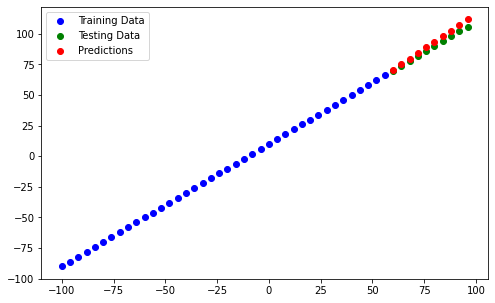

In [ ]:
# make and plot predicctions 
y_pred_2 = model_2.predict(X_test)
plot_predictions(predictions=y_pred_2)

In [ ]:
# calculaye model_2 evaluation_metrics 
mae_2 = mae(y_test, y_pred_2) 
mse_2 = mse(y_test, y_pred_2)
mae_2, mse_2

(<tf.Tensor: shape=(), dtype=float32, numpy=3.19694>,
 <tf.Tensor: shape=(), dtype=float32, numpy=13.070127>)

## Build Model 3 
* 2 layers, trained for 500 epochs

In [ ]:
# set random seed 
tf.random.set_seed(42)

# 1. Create model 3 
model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(10), 
    tf.keras.layers.Dense(1)
], name = 'model_2')

# 2. Compile the model 
model_3.compile(loss = tf.keras.losses.mae, 
              optimizer = tf.keras.optimizers.SGD(), 
              metrics = ['mae']) 

# 3. Fit the model 
model_3.fit(tf.expand_dims(X_train, axis = -1), y_train, epochs = 500)

Epoch 1/500
2/2 [==============================] - 1s 10ms/step - loss: 27.4058 - mae: 27.4058
Epoch 2/500
2/2 [==============================] - 0s 9ms/step - loss: 24.6339 - mae: 24.6339
Epoch 3/500
2/2 [==============================] - 0s 10ms/step - loss: 29.8935 - mae: 29.8935
Epoch 4/500
2/2 [==============================] - 0s 14ms/step - loss: 27.4055 - mae: 27.4055
Epoch 5/500
2/2 [==============================] - 0s 8ms/step - loss: 14.9463 - mae: 14.9463
Epoch 6/500
2/2 [==============================] - 0s 13ms/step - loss: 11.8819 - mae: 11.8819
Epoch 7/500
2/2 [==============================] - 0s 12ms/step - loss: 11.1988 - mae: 11.1988
Epoch 8/500
2/2 [==============================] - 0s 9ms/step - loss: 11.0910 - mae: 11.0910
Epoch 9/500
2/2 [==============================] - 0s 5ms/step - loss: 40.4763 - mae: 40.4763
Epoch 10/500
2/2 [==============================] - 0s 20ms/step - loss: 27.8687 - mae: 27.8687
Epoch 11/500
2/2 [==============================] - 0

1/1 [==============================] - 0s 48ms/step


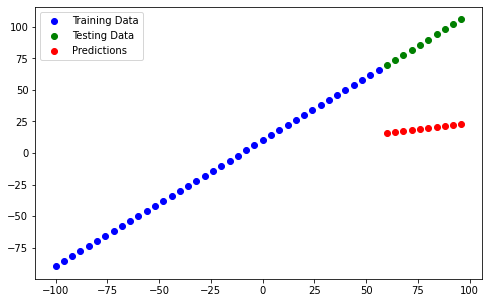

In [ ]:
# make and plot predicctions 
y_pred_3 = model_3.predict(X_test)
plot_predictions(predictions=y_pred_3)

In [ ]:
# calculaye model_2 evaluation_metrics 
mae_3 = mae(y_test, y_pred_3) 
mse_3 = mse(y_test, y_pred_3)
mae_3, mse_3

(<tf.Tensor: shape=(), dtype=float32, numpy=68.713615>,
 <tf.Tensor: shape=(), dtype=float32, numpy=4808.0273>)

### Comparing the results of our experiments

In [ ]:
import pandas as pd 

model_results = [['model_1', mae_1.numpy(), mse_1.numpy()], 
                 ['model_2', mae_2.numpy(), mse_2.numpy()], 
                 ['model_3', mae_3.numpy(), mse_3.numpy()]] 
results = pd.DataFrame(model_results, 
                       columns = ['model', 'mae', 'mse'])
results

,model,mae,mse
0,model_1,18.745327,353.573364
1,model_2,3.196940,13.070127
2,model_3,68.713615,4808.027344


- **Looks like model_2 performed better**

In [ ]:
model_2.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_21 (Dense)            (None, 10)                20        
                                                                 
 dense_22 (Dense)            (None, 1)                 11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


# Tracking your experiments 

* TensorBoard - a component of the TensorFlow library to help track modelling experiments 
* Weights and biases -  atool for tracking all kinds of machine learning experiments

## Saving our Model 
- Saving our model allows us to use them outside of Google colab (or wherever they were trained) such as in a web application or mobile app 

There are 2 ways to save a model 
  1. The SavedModel format 
  2. The HDF5 format

In [ ]:
# save the model using the SavedModel format
model_2.save('best_model_SavedModel_format')

In [ ]:
# save the model using the HDF5 format
model_2.save('best_model_HDF5_format.h5')

## Loading in a Saved Model

In [ ]:
loaded_SavedModel_format = tf.keras.models.load_model('/content/best_model_SavedModel_format')
loaded_SavedModel_format.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_21 (Dense)            (None, 10)                20        
                                                                 
 dense_22 (Dense)            (None, 1)                 11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model_2.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_21 (Dense)            (None, 10)                20        
                                                                 
 dense_22 (Dense)            (None, 1)                 11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# compare model_2 with saved model predictions 
loaded_SavedModel_format_preds =loaded_SavedModel_format.predict(X_test)
model_2_preds = model_2.predict(X_test)
loaded_SavedModel_format_preds == model_2_preds

1/1 [==============================] - 0s 26ms/step


array([[ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True]])

In [ ]:
mae(y_test, model_2_preds) == mae(y_test, loaded_SavedModel_format_preds)

<tf.Tensor: shape=(), dtype=bool, numpy=True>

In [ ]:
# load in a model using .h5 format 
loaded_h5_model = tf.keras.models.load_model('/content/best_model_HDF5_format.h5')
loaded_h5_model.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_21 (Dense)            (None, 10)                20        
                                                                 
 dense_22 (Dense)            (None, 1)                 11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# compare model_2 with loaded_h5_model predictions 
loaded_h5_model_preds =loaded_h5_model.predict(X_test)
model_2_preds = model_2.predict(X_test)
loaded_h5_model_preds == model_2_preds

1/1 [==============================] - 0s 26ms/step


array([[ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True]])

## Download a model or any other file from Google Colab 

1. You can go to the 'file' tab and right click on the file you're after and click 'download' 
2. Use code below

In [ ]:
# download a file from goole colab 
from google.colab import files
files.download('/content/best_model_HDF5_format.h5')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## A Larger example

In [ ]:
# import required libraries 
import tensorflow as tf 
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
# load the dataset 
insurance = pd.read_csv('https://raw.githubusercontent.com/rogercarelli/Medical_Cost_Personal_Dataset/main/raw_dataset.csv')
insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [ ]:
insurance_one_hot = pd.get_dummies(insurance)
insurance_one_hot.head()

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0


In [ ]:
# dependent and independent features 
X = insurance_one_hot.drop('charges', axis = 1)
y = insurance_one_hot['charges']

In [ ]:
# import train test split 
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size = 0.20, random_state = 42)
len(X), len(X_train), len(X_test)

(1338, 1070, 268)

In [169]:
X_train.head()

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
560,46,19.95,2,1,0,1,0,0,1,0,0
1285,47,24.32,0,1,0,1,0,1,0,0,0
1142,52,24.86,0,1,0,1,0,0,0,1,0
969,39,34.32,5,1,0,1,0,0,0,1,0
486,54,21.47,3,1,0,1,0,0,1,0,0


In [170]:
# Build a neural network (sort of like model_2 above)
# set random state 
tf.random.set_seed(42)

# 1. Create a model 
insurance_model = tf.keras.Sequential([
    tf.keras.layers.Dense(10), 
    tf.keras.layers.Dense(1)
]) 

# 2. compile the model 
insurance_model.compile(loss = tf.keras.losses.mae, 
                        optimizer = tf.keras.optimizers.SGD(), 
                        metrics=['mae'])

# 3. fit the model 
insurance_model.fit(tf.expand_dims(X_train, axis = -1), y_train, epochs = 100)

Epoch 1/100
34/34 [==============================] - 0s 1ms/step - loss: 13235.9590 - mae: 13235.9590
Epoch 2/100
34/34 [==============================] - 0s 2ms/step - loss: 12311.1182 - mae: 12311.1182
Epoch 3/100
34/34 [==============================] - 0s 1ms/step - loss: 12173.6699 - mae: 12173.6699
Epoch 4/100
34/34 [==============================] - 0s 1ms/step - loss: 12099.2920 - mae: 12099.2920
Epoch 5/100
34/34 [==============================] - 0s 1ms/step - loss: 11985.4248 - mae: 11985.4248
Epoch 6/100
34/34 [==============================] - 0s 2ms/step - loss: 11799.9395 - mae: 11799.9395
Epoch 7/100
34/34 [==============================] - 0s 1ms/step - loss: 11476.8359 - mae: 11476.8359
Epoch 8/100
34/34 [==============================] - 0s 1ms/step - loss: 10967.0283 - mae: 10967.0283
Epoch 9/100
34/34 [==============================] - 0s 1ms/step - loss: 10350.2998 - mae: 10350.2998
Epoch 10/100
34/34 [==============================] - 0s 2ms/step - loss: 9702.670

In [171]:
# check the results of the insurance model on the test data 
insurance_model.evaluate(X_test, y_test)

9/9 [==============================] - 0s 2ms/step - loss: 8921.2812 - mae: 8921.2812


[8921.28125, 8921.28125]

In [172]:
y_train.median(), y_train.mean()

(9575.4421, 13346.089736364485)

- Right now, it looks like our model isn't performing too well

To try and improve or model, we will run 2 experiments: 
1. Add an extra layer, with more hidden units 
2. Train for longer 

In [176]:
# Build a neural network (sort of like model_2 above)
# set random state 
tf.random.set_seed(42)

# 1. Create a model 
insurance_model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(100), 
    tf.keras.layers.Dense(10), 
    tf.keras.layers.Dense(1)
]) 

# 2. compile the model 
insurance_model_2.compile(loss = tf.keras.losses.mae, 
                        optimizer = tf.keras.optimizers.Adam(), 
                        metrics=['mae'])

# 3. fit the model 
insurance_model_2.fit(tf.expand_dims(X_train, axis = -1), y_train, epochs = 100, verbose = 1)

Epoch 1/100
34/34 [==============================] - 1s 3ms/step - loss: 13335.7275 - mae: 13335.7275
Epoch 2/100
34/34 [==============================] - 0s 2ms/step - loss: 13314.8389 - mae: 13314.8389
Epoch 3/100
34/34 [==============================] - 0s 2ms/step - loss: 13274.5283 - mae: 13274.5283
Epoch 4/100
34/34 [==============================] - 0s 2ms/step - loss: 13199.7266 - mae: 13199.7266
Epoch 5/100
34/34 [==============================] - 0s 3ms/step - loss: 13074.9053 - mae: 13074.9053
Epoch 6/100
34/34 [==============================] - 0s 2ms/step - loss: 12889.0273 - mae: 12889.0273
Epoch 7/100
34/34 [==============================] - 0s 2ms/step - loss: 12651.0098 - mae: 12651.0098
Epoch 8/100
34/34 [==============================] - 0s 2ms/step - loss: 12395.2949 - mae: 12395.2949
Epoch 9/100
34/34 [==============================] - 0s 3ms/step - loss: 12192.5039 - mae: 12192.5039
Epoch 10/100
34/34 [==============================] - 0s 2ms/step - loss: 12110.98

In [177]:
# check the results of the insurance model_2 on the test data 
insurance_model_2.evaluate(X_test, y_test)

9/9 [==============================] - 0s 3ms/step - loss: 8627.9434 - mae: 8627.9434


[8627.943359375, 8627.943359375]

### Build the 3rd model 


In [180]:
# Build a neural network (sort of like model_2 above)
# set random state 
tf.random.set_seed(42)

# 1. Create a model 
insurance_model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(100), 
    tf.keras.layers.Dense(10), 
    tf.keras.layers.Dense(1)
]) 

# 2. compile the model 
insurance_model_3.compile(loss = tf.keras.losses.mae, 
                        optimizer = tf.keras.optimizers.Adam(), 
                        metrics=['mae'])

# 3. fit the model 
history = insurance_model_3.fit(tf.expand_dims(X_train, axis = -1), y_train, epochs = 200, verbose = 1)

Epoch 1/200
34/34 [==============================] - 1s 2ms/step - loss: 13335.7275 - mae: 13335.7275
Epoch 2/200
34/34 [==============================] - 0s 3ms/step - loss: 13314.8389 - mae: 13314.8389
Epoch 3/200
34/34 [==============================] - 0s 3ms/step - loss: 13274.5283 - mae: 13274.5283
Epoch 4/200
34/34 [==============================] - 0s 2ms/step - loss: 13199.7266 - mae: 13199.7266
Epoch 5/200
34/34 [==============================] - 0s 2ms/step - loss: 13074.9053 - mae: 13074.9053
Epoch 6/200
34/34 [==============================] - 0s 2ms/step - loss: 12889.0273 - mae: 12889.0273
Epoch 7/200
34/34 [==============================] - 0s 2ms/step - loss: 12651.0098 - mae: 12651.0098
Epoch 8/200
34/34 [==============================] - 0s 2ms/step - loss: 12395.2949 - mae: 12395.2949
Epoch 9/200
34/34 [==============================] - 0s 2ms/step - loss: 12192.5039 - mae: 12192.5039
Epoch 10/200
34/34 [==============================] - 0s 2ms/step - loss: 12110.98

In [179]:
# check the results of the insurance model on the test data 
insurance_model_3.evaluate(X_test, y_test)

9/9 [==============================] - 0s 2ms/step - loss: 8632.2910 - mae: 8632.2910


[8632.291015625, 8632.291015625]

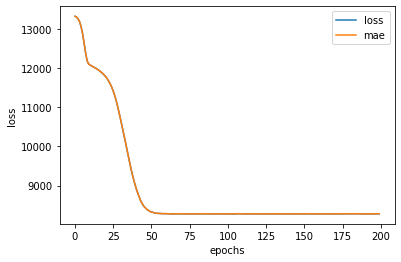

In [181]:
# plot history (also know as a loss curve or a training curve)
pd.DataFrame(history.history).plot()
plt.ylabel('loss')
plt.xlabel('epochs')
plt.show()

## Preprocessing data (normalization and standardization) 

Scale features (Neural networks prefer Normalization

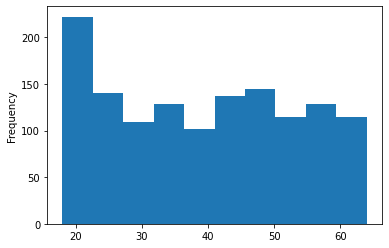

In [182]:
X['age'].plot(kind = 'hist')

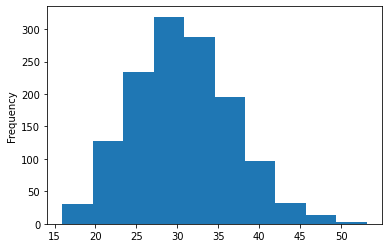

In [183]:
X['bmi'].plot(kind = 'hist')

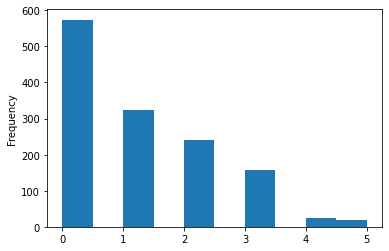

In [184]:
X['children'].plot(kind = 'hist')

In [185]:
# top 5 records
insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [186]:
from sklearn.compose import make_column_transformer 
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder

In [187]:
# create a column transformer 
ct = make_column_transformer(
    (MinMaxScaler(), ['age', 'bmi', 'children']), 
    (OneHotEncoder(handle_unknown='ignore'), ['sex', 'smoker', 'region'])
)

# create X and y 
X = insurance.drop('charges', axis = 1)
y = insurance['charges']

# import train test split 
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size = 0.20, random_state = 42)
# len(X), len(X_train), len(X_test)

# fit thr column transformer to our training data 
ct.fit(X_train)

# Transform training and test data with MinMax Scaler and OneHotEncoder 
X_train_normal = ct.transform(X_train)
X_test_normal = ct.transform(X_test)

In [190]:
X_train.head()

,age,sex,bmi,children,smoker,region
560,46,female,19.95,2,no,northwest
1285,47,female,24.32,0,no,northeast
1142,52,female,24.86,0,no,southeast
969,39,female,34.32,5,no,southeast
486,54,female,21.47,3,no,northwest


In [191]:
X_train_normal[0]

array([0.60869565, 0.10734463, 0.4       , 1.        , 0.        ,
       1.        , 0.        , 0.        , 1.        , 0.        ,
       0.        ])

In [192]:
X_train_normal.shape, X_train.shape

((1070, 11), (1070, 6))

In [198]:
# Build a neural network (sort of like model_2 above)
# set random state 
tf.random.set_seed(42)

# 1. Create a model 
insurance_model_4 = tf.keras.Sequential([
    tf.keras.layers.Dense(100), 
    tf.keras.layers.Dense(10), 
    tf.keras.layers.Dense(1)
]) 

# 2. compile the model 
insurance_model_4.compile(loss = tf.keras.losses.mae, 
                        optimizer = tf.keras.optimizers.Adam(0.01), 
                        metrics=['mae'])

# 3. fit the model 
insurance_model_4.fit(tf.expand_dims(X_train_normal, axis = -1), y_train, epochs = 100, verbose = 1)

Epoch 1/100
34/34 [==============================] - 2s 2ms/step - loss: 13310.5312 - mae: 13310.5312
Epoch 2/100
34/34 [==============================] - 0s 3ms/step - loss: 12773.6621 - mae: 12773.6621
Epoch 3/100
34/34 [==============================] - 0s 2ms/step - loss: 10700.9082 - mae: 10700.9082
Epoch 4/100
34/34 [==============================] - 0s 2ms/step - loss: 8725.9189 - mae: 8725.9189
Epoch 5/100
34/34 [==============================] - 0s 3ms/step - loss: 8516.7227 - mae: 8516.7227
Epoch 6/100
34/34 [==============================] - 0s 2ms/step - loss: 8435.3105 - mae: 8435.3105
Epoch 7/100
34/34 [==============================] - 0s 2ms/step - loss: 8371.3193 - mae: 8371.3193
Epoch 8/100
34/34 [==============================] - 0s 2ms/step - loss: 8332.7197 - mae: 8332.7197
Epoch 9/100
34/34 [==============================] - 0s 2ms/step - loss: 8312.3701 - mae: 8312.3701
Epoch 10/100
34/34 [==============================] - 0s 3ms/step - loss: 8298.4893 - mae: 829

In [199]:
insurance_model_4.evaluate(X_test_normal, y_test)

9/9 [==============================] - 0s 2ms/step - loss: 8640.4053 - mae: 8640.4053


[8640.4052734375, 8640.4052734375]